## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.4]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(drop)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 9s 183us/step - loss: 1.1424 - acc: 0.5895 - val_loss: 1.2899 - val_acc: 0.5429
Epoch 48/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1311 - acc: 0.5945 - val_loss: 1.2962 - val_acc: 0.5392
Epoch 49/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.1200 - acc: 0.5966 - val_loss: 1.2788 - val_acc: 0.5440
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.1203 - acc: 0.5982 - val_loss: 1.2993 - val_acc: 0.5363
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0   

50000/50000 [==============================] - 10s 196us/step - loss: 1.3363 - acc: 0.5203 - val_loss: 1.3317 - val_acc: 0.5223
Epoch 44/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.3233 - acc: 0.5268 - val_loss: 1.3339 - val_acc: 0.5195
Epoch 45/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3248 - acc: 0.5263 - val_loss: 1.3431 - val_acc: 0.5195
Epoch 46/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.3155 - acc: 0.5295 - val_loss: 1.3234 - val_acc: 0.5271
Epoch 47/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3067 - acc: 0.5315 - val_loss: 1.3234 - val_acc: 0.5279
Epoch 48/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3030 - acc: 0.5334 - val_loss: 1.3202 - val_acc: 0.5265
Epoch 49/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.2896 - acc: 0.5366 - val_loss: 1.3361 - val_acc: 0.5227
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 10s 195us/step - loss: 1.6380 - acc: 0.4088 - val_loss: 1.5250 - val_acc: 0.4518
Epoch 40/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6340 - acc: 0.4116 - val_loss: 1.5111 - val_acc: 0.4515
Epoch 41/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6276 - acc: 0.4083 - val_loss: 1.5106 - val_acc: 0.4559
Epoch 42/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6239 - acc: 0.4118 - val_loss: 1.5090 - val_acc: 0.4575
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6142 - acc: 0.4156 - val_loss: 1.4928 - val_acc: 0.4636
Epoch 44/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6087 - acc: 0.4204 - val_loss: 1.4958 - val_acc: 0.4621
Epoch 45/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6112 - acc: 0.4179 - val_loss: 1.4879 - val_acc: 0.4719
Epoch 46/50
50000/50000 [=========

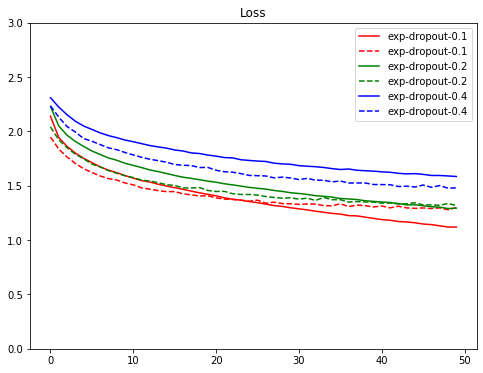

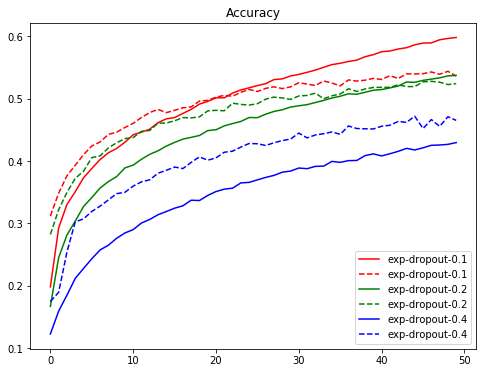

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()